## mnist 손글씨 숫자 분류

In [386]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [387]:
train_images.shape

(60000, 28, 28)

In [388]:
len(train_labels)

60000

In [389]:
test_images.shape

(10000, 28, 28)

In [390]:
test_labels.shape

(10000,)

In [391]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [392]:
test_images.shape

(10000, 28, 28)

In [393]:
len(test_labels)

10000

In [394]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [395]:
test_labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [396]:
import matplotlib.pyplot as plt

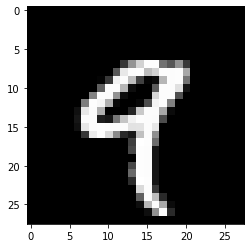

In [397]:
digit = train_images[4]
#plt.imshow(digit, cmap='gray')
plt.imshow(digit, cmap=plt.cm.gray)
plt.show()

In [398]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [399]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [400]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [401]:
from keras.utils import to_categorical

print(train_labels[0])

train_labels = to_categorical(train_labels)
print(train_labels[0])
test_labels = to_categorical(test_labels)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [402]:
history=network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2574 - accuracy: 0.9251
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1048 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0693 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0491 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0371 - accuracy: 0.9883


In [403]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 68us/step


In [404]:
print('test_acc:', test_acc)

test_acc: 0.9768999814987183


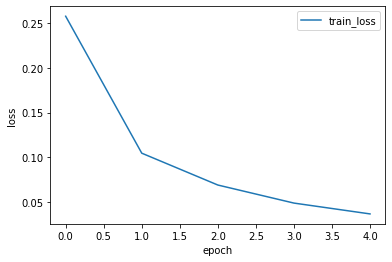

In [405]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

## 영화 리뷰 분류 : 이진 분류

In [406]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [407]:
len(train_data)

25000

In [408]:
len(test_labels)

25000

In [409]:
train_labels[0]

1

In [410]:
max([max(sequence) for sequence in train_data])

9999

In [411]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
#print(word_index)
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)
# 리뷰를 디코딩합니다. 

# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [412]:
import numpy as np
temp = ([[1,3,5,7],[2,4,6,8]])
results = np.zeros((len(temp), 10))
for i, value in enumerate(temp):
    results[i, value] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
results


array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])

In [413]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

np.set_printoptions(threshold=100000)
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
#print( x_train.shape)
#print(x_train[0])

# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [414]:
#print(type(train_labels))
#print(train_labels[0])
temp = np.array([1,2,3,4,5])

temp_copy = np.asarray(temp).astype('float32')
print(type(temp_copy))
temp_copy[0]=10
print(temp)
print(temp_copy)


<class 'numpy.ndarray'>
[1 2 3 4 5]
[10.  2.  3.  4.  5.]


In [415]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [416]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [417]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [418]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [420]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 726us/step - loss: 0.4986 - accuracy: 0.7883 - val_loss: 0.3825 - val_accuracy: 0.8517
Epoch 2/20
15000/15000 [==============================] - 10s 663us/step - loss: 0.2870 - accuracy: 0.9039 - val_loss: 0.2962 - val_accuracy: 0.8858
Epoch 3/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.2098 - accuracy: 0.9317 - val_loss: 0.2999 - val_accuracy: 0.8799
Epoch 4/20
15000/15000 [==============================] - 4s 241us/step - loss: 0.1671 - accuracy: 0.9449 - val_loss: 0.2763 - val_accuracy: 0.8889
Epoch 5/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.1348 - accuracy: 0.9567 - val_loss: 0.2965 - val_accuracy: 0.8819
Epoch 6/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.3264 - val_accuracy: 0.8804
Epoch 7/20
15000/15000 [==============================] - 3s

In [421]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [423]:
history_dict.values()
history_dict['val_loss']

[0.3825051475524902,
 0.2962454730987549,
 0.299905841588974,
 0.27628482122421266,
 0.29649524779319764,
 0.32636969051361087,
 0.3211571063041687,
 0.34379295234680174,
 0.38530551438331606,
 0.39228779888153076,
 0.42188029623031614,
 0.45103589806556704,
 0.5046776798725128,
 0.5153805716514588,
 0.5517876432895661,
 0.5892109533309936,
 0.6440531529426575,
 0.6577317228317261,
 0.6938319324493408,
 0.7203636443138123]

In [216]:
import matplotlib.pyplot as plt

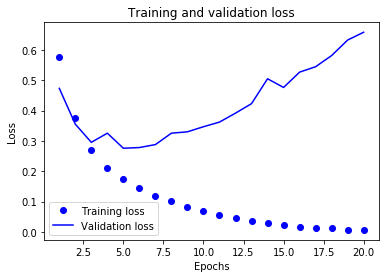

In [217]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

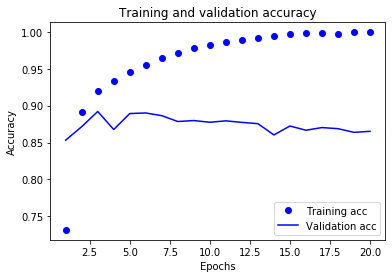

In [241]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [439]:
def decode_str(str):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, ' ') for i in str])
    print(decoded_review)

#y_hat = model.predict(x_test[0:1])
#y_hat = model.predict_classes(x_test[0:1])
y_hat = model.predict_proba(x_test[0:1])
decode_str(test_data[0])
print(y_hat)

  please give this one a miss br br     and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite   so all you madison fans give this a miss
[[0.00931368]]


In [253]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.4422 - accuracy: 0.8322
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.2554 - accuracy: 0.9109
Epoch 3/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.1963 - accuracy: 0.9309
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [254]:
results

[0.2959932935810089, 0.8833199739456177]

In [257]:
model.predict(x_test)

array([[2.10345954e-01],
       [9.99957919e-01],
       [7.82533884e-01],
       [8.23664665e-01],
       [9.59069729e-01],
       [8.63010049e-01],
       [9.99660373e-01],
       [9.59700346e-03],
       [9.72560048e-01],
       [9.90432322e-01],
       [9.12042081e-01],
       [1.04226470e-02],
       [3.12089920e-04],
       [1.93113983e-02],
       [9.98633981e-01],
       [1.71393156e-04],
       [8.70608270e-01],
       [8.38698506e-01],
       [5.41558862e-03],
       [6.33562505e-02],
       [9.96661544e-01],
       [9.95805502e-01],
       [1.68687165e-01],
       [9.30456340e-01],
       [8.70835364e-01],
       [9.79141116e-01],
       [2.60106623e-02],
       [9.23454762e-01],
       [9.59182262e-01],
       [3.35872173e-04],
       [9.82875466e-01],
       [1.69561654e-01],
       [8.91968250e-01],
       [8.00474936e-06],
       [2.80982256e-02],
       [1.82830393e-02],
       [9.99353766e-01],
       [9.64739144e-01],
       [1.65746450e-01],
       [1.69171393e-02],


## 영화 리뷰 분류 : 다중 분류

In [440]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [441]:
len(train_data)

8982

In [442]:
len(test_data)

2246

In [443]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [444]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [445]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [446]:
train_labels[10]

3

In [447]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [267]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [448]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [449]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [450]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [272]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [273]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 166us/step - loss: 2.5248 - accuracy: 0.4667 - val_loss: 1.6695 - val_accuracy: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.3686 - accuracy: 0.7181 - val_loss: 1.2646 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.0109 - accuracy: 0.7861 - val_loss: 1.0959 - val_accuracy: 0.7760 - loss: 1.0301 - accura
Epoch 4/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.7961 - accuracy: 0.8344 - val_loss: 1.0125 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.6351 - accuracy: 0.8641 - val_loss: 0.9470 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5092 - accuracy: 0.8953 - val_loss: 0.9386 - val_accuracy: 0.7980
Epoch 7/20
7982/7982 [==============================

In [274]:
import matplotlib.pyplot as plt

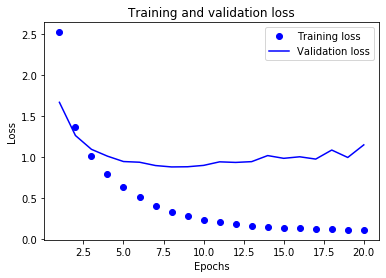

In [275]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

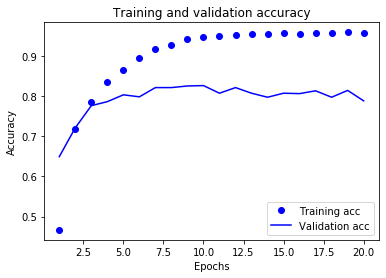

In [276]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [277]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 136us/step - loss: 2.6349 - accuracy: 0.5328 - val_loss: 1.7827 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.4328 - accuracy: 0.7122 - val_loss: 1.3150 - val_accuracy: 0.7350
Epoch 3/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.0550 - accuracy: 0.7800 - val_loss: 1.1345 - val_accuracy: 0.7640
Epoch 4/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.8303 - accuracy: 0.8256 - val_loss: 1.0271 - val_accuracy: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.6649 - accuracy: 0.8627 - val_loss: 0.9705 - val_accuracy: 0.8120
Epoch 6/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.5316 - accuracy: 0.8929 - val_loss: 0.9233 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.428

In [278]:
results

[0.9752436665053466, 0.7862867116928101]

In [286]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1834372217275156

In [287]:
predictions = model.predict(x_test)

In [288]:
predictions[0].shape

(46,)

In [289]:
np.sum(predictions[0])

0.99999994

In [290]:
np.argmax(predictions[0])

3

In [293]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [294]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [295]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 191us/step - loss: 2.9657 - accuracy: 0.2224 - val_loss: 2.2878 - val_accuracy: 0.3090
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.8746 - accuracy: 0.5634 - val_loss: 1.6033 - val_accuracy: 0.6570
Epoch 3/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.4048 - accuracy: 0.6728 - val_loss: 1.4157 - val_accuracy: 0.6650
Epoch 4/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.2061 - accuracy: 0.6834 - val_loss: 1.3529 - val_accuracy: 0.6720
Epoch 5/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.0519 - accuracy: 0.7263 - val_loss: 1.2914 - val_accuracy: 0.7000
Epoch 6/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.9407 - accuracy: 0.7477 - val_loss: 1.3155 - val_accuracy: 0.6990
Epoch 7/20
7982/7982 [==============================] - 1s 177us/step - loss

## 주택 가격 예측: 회귀 문제 

In [451]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [452]:
train_data.shape

(404, 13)

In [453]:
test_data.shape

(102, 13)

In [454]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [455]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [456]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [458]:
# 이차원 배열 합치기 
temp_data = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
k = 3
num_samples = len(temp_data) // k

i=1
p_data = np.concatenate(
        [temp_data[:i * num_samples],
         temp_data[(i + 1) * num_samples:]],
        axis=0)
print(p_data)

[[ 1  2  9 10]
 [ 3  4 11 12]]


In [323]:

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [324]:
all_scores

[2.0423433780670166, 2.279268264770508, 2.6160387992858887, 2.3703083992004395]

In [325]:
np.mean(all_scores)

2.326989710330963

In [326]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [357]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
#    print(len(mae_history))
    all_mae_histories.append(mae_history)
#history_dict = history.history
#print(history_dict.keys())

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [361]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [330]:
import matplotlib.pyplot as plt

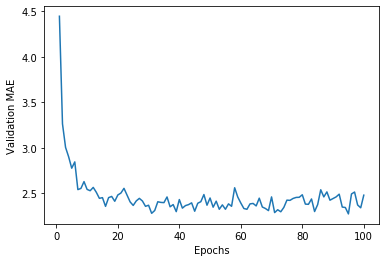

In [331]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

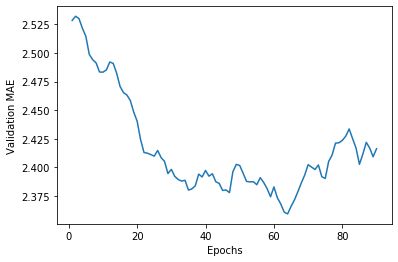

In [345]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [155]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 127us/step


In [156]:
test_mae_score

2.5095155239105225